In [112]:
import jieba
import numpy as np
from jieba import posseg
from collections import defaultdict


def cut(string):
    return list(jieba.cut(string))


def idf(word):
    eps = 1e-6
    
    return 1 / (np.log10(sum(1 for s in sentences if word in s)) + eps)


def tf(word, sentence_cut):
    return sentence_cut.count(word)


def tfidf(word, sentence):
    return tf(word, sentence) * idf(word)


def get_tfidf_from_sentence(sentence_cut):
    ## you code here
    '''
    return : a dictionary
    '''
    
    tf_idf_words = dict()
    
    for c in set(sentence_cut):
        tf_idf_words[c] = tfidf(c, sentence_cut)
        
    return tf_idf_words


def get_top_tfidf(sentence_cut, ratio=0.25):
    """
    return : [(word1, tfidf_value), (word2, tfidf_value)]
    """
    tfidf_value = get_tfidf_from_sentence(sentence_cut)
    
    top_ratio = ratio
    
    return sorted(tfidf_value.items(), key=lambda x: x[1], reverse=True)[:int(len(tfidf_value)*top_ratio)]


def is_name(cut_word):
    w, _type = list(posseg.cut(cut_word))[0]
    
    if _type == 'nr': return True
    
    return False


# def get_names_from_sentence(sentence: str):
#     names = []
    
#     for w_t in posseg.cut(cut_word):
#         w, t = tuple(w_t)
        
#         if t ++ 
#     return [w for w in cut_sentence if is_name(w)]


# we do some refractor
def get_name_correlate(sentence: str):
    
    name_correlate = defaultdict(lambda : defaultdict(int))
    
    names = []
    
    for w_t in posseg.cut(sentence):
        w, t = tuple(w_t)
        
        if t == 'nr': names.append(w)
            
    for n in names:
        for w in names:
            if n == w: continue
                
            name_correlate[n][w] += 1 
    
    return name_correlate

In [2]:
content = open('dataset/article_9k.txt')
CHARACTERS = content.read()

In [3]:
sentences = CHARACTERS.split('\n')
all_sentences_with_cut_tokens = []

In [4]:
all_sentences_with_cut_tokens = [cut(s) for s in sentences]

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/t4/cqwq7kjd23zb1pddhb8858rh0000gn/T/jieba.cache
Loading model cost 0.864 seconds.
Prefix dict has been built succesfully.


## Practice 用tf-idf来表征单词的重要性

In [5]:
sample_news = get_top_tfidf(all_sentences_with_cut_tokens[99])

In [6]:
sample_news

[('任远明', 1000000.0),
 ('服务卡', 3.321922577293393),
 ('邮储', 2.880754937115057),
 ('工会', 2.1986151062485737),
 ('会籍', 2.0958988814880564),
 ('四川省', 1.877751728962409),
 ('正阳', 1.7954218232340378),
 ('总工会', 1.5276591648884605),
 ('普惠性', 1.4306755346564182),
 ('邮政', 1.3404543612178637),
 ('分行', 1.209673545005994),
 ('会员', 1.1436194292939366),
 ('服务', 1.0351708152199),
 ('省', 0.9591856844299416),
 ('摄据', 0.9266275493897159),
 ('银行', 0.857793461373016),
 ('合作', 0.7672664304498398),
 ('公司', 0.7587249254744466),
 ('党组', 0.7339192276116211),
 ('签约', 0.7227635066571622)]

In [7]:
import random

In [108]:
random_article_id = random.randint(0, 10000)
sample_news = get_top_tfidf(all_sentences_with_cut_tokens[random_article_id])

In [9]:
sample_news

[('386884', 1000000.0),
 ('公司债', 2.182798560741661),
 ('发行', 2.0521499452539005),
 ('调整期', 1.2243877552582467),
 ('缩水', 1.0699577312598316),
 ('募集', 0.883072844362164),
 ('只数', 0.8725021082885628),
 ('今年以来', 0.7029632261905293),
 ('经参', 0.6585381373201477),
 ('较紧', 0.6425481916007906),
 ('wwwstcncom06', 0.6376726584217304),
 ('规模', 0.5586571716735749),
 ('起色', 0.5438181203771033),
 ('证券时报', 0.5419763266432966),
 ('同期相比', 0.5300844878652039),
 ('424', 0.5269736491516478),
 ('企业', 0.5116369451466272),
 ('七成', 0.47380100514998263)]

In [76]:
value_a, value_b = ('a', 'b')

In [81]:
some_list = [1, 2, 3, 4, 5]

In [82]:
even_number = [n for n in some_list if n % 2 == 0]

In [83]:
#frequency_dict = dict()

frequency_dict = {w: tfidf for w, tfidf in sample_news}

# for w, tfidf in sample_news:
#     print(w)
#     print(tfidf)
    
#     frequency_dict[w] = tfidf

In [84]:
frequency_dict

{'386884': 1000000.0,
 '公司债': 2.182798560741661,
 '发行': 2.0521499452539005,
 '调整期': 1.2243877552582467,
 '缩水': 1.0699577312598316,
 '募集': 0.883072844362164,
 '只数': 0.8725021082885628,
 '今年以来': 0.7029632261905293,
 '经参': 0.6585381373201477,
 '较紧': 0.6425481916007906,
 'wwwstcncom06': 0.6376726584217304,
 '规模': 0.5586571716735749,
 '起色': 0.5438181203771033,
 '证券时报': 0.5419763266432966,
 '同期相比': 0.5300844878652039,
 '424': 0.5269736491516478,
 '企业': 0.5116369451466272,
 '七成': 0.47380100514998263}

In [10]:
from wordcloud import WordCloud

In [91]:
wc = WordCloud(font_path='fonts/SimHei.ttf')

In [103]:
wc.generate_from_frequencies(frequency_dict)

In [93]:
%matplotlib inline

In [94]:
import matplotlib.pyplot as plt

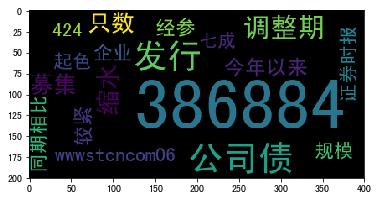

In [104]:
plt.imshow(wc)

In [97]:
def plot_word_cloud(string):
    cut_string = cut(string)
    wc.generate_from_frequencies({k: v for k, v in get_top_tfidf(cut_string)})
    plt.imshow(wc)

In [58]:
point_a = point_a + (4, 5, 6)

In [59]:
point_a

(1, 2, 3, 4, 5, 6)

/Users/gaominquan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  


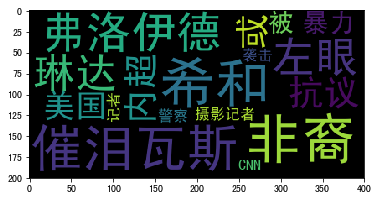

In [110]:
plot_word_cloud('【美国暴力抗议浪潮：#美国超60名记者遭逮捕或袭击#】近期，非裔美国人乔治·弗洛伊德“遭警察暴力执法致死”事件引发大范围抗议示威，多名记者被警察攻击或拘捕。美行业团体称，48小时内超60名记者遇袭或被捕。其中CNN摄影记者琳达·蒂拉多被橡胶子弹击中，其左眼有可能永久性失明，MSNBC主持人阿里·维尔希和同事被催泪瓦斯袭击……')

## point_a 没有可以自己修改自己值的method

In [60]:
dir(point_a)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']

In [61]:
dir(point_b)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [62]:
some_dictionary = {}

In [63]:
some_dictionary[point_a] = 'red'

In [64]:
some_dictionary[point_b] = 'green'

TypeError: unhashable type: 'list'

In [67]:
some_ditionary = {
    'key_1': 'value_1',
    'key_2': 'value_2',
    'key_3': 'value_3',
    'key_4': 'value_4',
    'key_5': 'value_5',
    'key_6': 'value_6',
    'key_7': 'value_7',
    'key_8': 'value_8',
}

In [69]:
some_ditionary['key_1'] # -> 'key_1' 的 地址， hash(value) -> 地址 

'value_1'

In [72]:
hash('key_1')

-3839962503235498640

In [73]:
hash('key_2')

-3898426199850900750

In [70]:
some_ditionary['key_8'] # -> 'key_8' 的地址

'value_8'

In [ ]:
some_dictionary[point_b] = 'green'

In [ ]:
point_b.append('a') # point_b的值变了，值变了之后，hash(point_b)变了
# dictionary -> 拿不到当时存的时候 的那个值了

In [ ]:
some_dictionary[point_b]

In [ ]:
list()
set()
dict()

## Python内部：dictionary

In [56]:
point_b.append(4)

In [57]:
point_b

[2, 3, 4, 4]

In [45]:
x, y, z = point_a
x_b, y_b, z_b = point_b

In [46]:
x_b

2

In [47]:
y_b

3

In [42]:
x

1

In [43]:
y

2

In [44]:
z

3

In [21]:
some_list = [1, 2, 3, 4, 5, 'Int', (2, 3, 4)]

In [24]:
some_list[0]

1

In [25]:
some_list[5]

'Int'

## C++ / C / Java / Matlab

In [26]:
array = [1, 2, 3, 4, 5]

In [27]:
char_array = ['a', 'b']

## 列表 list

In [28]:
array = [1, 2, 3, 4, 1, 3,1, 1, 1, 2, 1, 1, 1, 3, 1, 4, 10]

In [ ]:
some_java_code = [1, 'a', 5, [1, 2, 3]]

In [ ]:
some_java_code[1]

In [ ]:
java -> |1 |'a' |5 |[1, 2, 3] |9 | | | | | | | | | | | | | | | | | | | | | | | | | 
python -> | 01010101010101010 | 1010101010101010 | 1010101010101011 | 1010101010101001 | 

In [ ]:
1 -> some_address # 01010101010101010 # 3EAB593B
'a' -> some_address #1010101010101010 # 

In [37]:
python_list = ['a', (1, 2), [3, 4, 5], 10]

In [ ]:
python_list = ['01010101010101010', '1010101010101010']

In [35]:
%%time
array[0] # array's address + 1 * len(Int)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.2 µs


1

In [36]:
%%time
array[15]

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs


4

In [13]:
wc.generate_from_frequencies?

## Graph 图

![](imgs/g_1.png)

![](imgs/g_2.jpg)

![](imgs/g_3.jpg)

In [111]:
import networkx as nx

In [113]:
sentences[1000]

'在上周五刚刚结束的挑战的法则中由潘玮柏大张伟戚薇乔杉刘维于小彤组成的首发嘉宾阵容在经过第一期户外挑战和比拼之后迎来了他们首次舞台表演潘玮柏首发登场霸气演绎分裂的时光超完美表演惊艳全场当晚6位嘉宾纷纷放大招拿出自己最擅长的绝技为观众呈现了一场最完美的演出潘玮柏首发登场经典歌曲被遗忘的时光24个比利的全新改编演绎分裂的时光在原曲嘻哈流行的基础上加入弦乐伴奏与合唱团搭配瞬间气势磅礴充满张力尤其独有的潘氏低音炮一开嗓就引发全场尖叫苏到极致让人见识到什么是开口跪系列舞台上的潘玮柏霸气侧漏气场十足特别是高潮处呈现出的那种撕心裂肺的感觉仿佛能把人带到歌的故事里去这个改编跟原曲比起来节奏放缓了却在这缓慢抒情的演绎中又不缺乏爆发力像在对人们诉说着他的音乐他的追求超震撼演绎瞬间引发网友热议这个版本的24个比利太震撼了现场还是那么稳从头赞到尾的表演低音好撩人实力没得说不愧为初代偶像超级帅的现场很有感觉男神魅力依旧不减啊现场是真的稳'

In [120]:
sample_correlate = get_name_correlate(sentences[1000])

In [169]:
sample_correlate

defaultdict(<function __main__.get_name_correlate.<locals>.<lambda>()>,
            {'潘玮柏': defaultdict(int,
                         {'大张伟': 4,
                          '戚薇': 4,
                          '乔杉': 4,
                          '刘维': 4,
                          '张力': 4,
                          '潘氏': 4,
                          '高潮': 4}),
             '大张伟': defaultdict(int,
                         {'潘玮柏': 4,
                          '戚薇': 1,
                          '乔杉': 1,
                          '刘维': 1,
                          '张力': 1,
                          '潘氏': 1,
                          '高潮': 1}),
             '戚薇': defaultdict(int,
                         {'潘玮柏': 4,
                          '大张伟': 1,
                          '乔杉': 1,
                          '刘维': 1,
                          '张力': 1,
                          '潘氏': 1,
                          '高潮': 1}),
             '乔杉': defaultdict(int,
                         {'潘玮柏': 4,
 

In [131]:
from collections import defaultdict

In [145]:
dict()

{}

In [149]:
some_test_defalut = defaultdict(int)

In [150]:
some_test_defalut['a'] += 10

In [151]:
some_test_defalut['a']

10

In [161]:
simple_graph = defaultdict(list)

for key, relation in sample_correlate.items():
    simple_graph[key] += [name for name in relation]

In [162]:
simple_graph

defaultdict(list,
            {'潘玮柏': ['大张伟', '戚薇', '乔杉', '刘维', '张力', '潘氏', '高潮'],
             '大张伟': ['潘玮柏', '戚薇', '乔杉', '刘维', '张力', '潘氏', '高潮'],
             '戚薇': ['潘玮柏', '大张伟', '乔杉', '刘维', '张力', '潘氏', '高潮'],
             '乔杉': ['潘玮柏', '大张伟', '戚薇', '刘维', '张力', '潘氏', '高潮'],
             '刘维': ['潘玮柏', '大张伟', '戚薇', '乔杉', '张力', '潘氏', '高潮'],
             '张力': ['潘玮柏', '大张伟', '戚薇', '乔杉', '刘维', '潘氏', '高潮'],
             '潘氏': ['潘玮柏', '大张伟', '戚薇', '乔杉', '刘维', '张力', '高潮'],
             '高潮': ['潘玮柏', '大张伟', '戚薇', '乔杉', '刘维', '张力', '潘氏']})

In [163]:
city_graph = {
    '北京': ['天津', '河北'],
    '天津': ['山西'],
    '山西': ['陕西']
}

In [164]:
mini_graph = nx.Graph(city_graph)

/Users/gaominquan/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


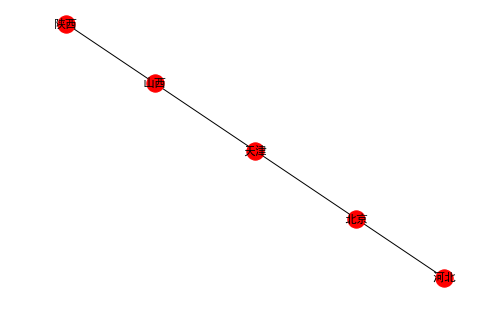

In [165]:
nx.draw(mini_graph, with_labels=True)

In [166]:
simple_graph_vis = nx.Graph(simple_graph)

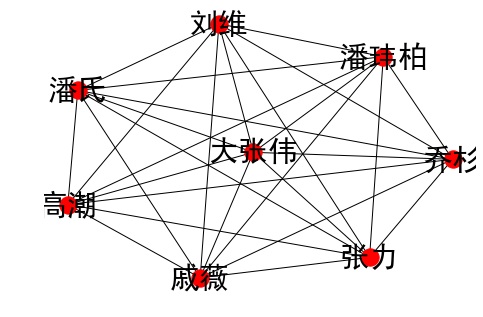

In [168]:
nx.draw(simple_graph_vis, with_labels=True, font_size=30)

In [194]:
graph_with_weight_vis = nx.Graph()

for k, d in sample_correlate.items():
    for name, value in d.items():
        #print(k, name, value)
        graph_with_weight_vis.add_weighted_edges_from([(k, name, value)])

In [195]:
pos = nx.spectral_layout(graph_with_weigth_vis)

In [196]:
edges = []

In [197]:
for k, d in sample_correlate.items():
    for name, value in d.items():
        edges.append((k, name, value))

In [198]:
edges

[('潘玮柏', '大张伟', 4),
 ('潘玮柏', '戚薇', 4),
 ('潘玮柏', '乔杉', 4),
 ('潘玮柏', '刘维', 4),
 ('潘玮柏', '张力', 4),
 ('潘玮柏', '潘氏', 4),
 ('潘玮柏', '高潮', 4),
 ('大张伟', '潘玮柏', 4),
 ('大张伟', '戚薇', 1),
 ('大张伟', '乔杉', 1),
 ('大张伟', '刘维', 1),
 ('大张伟', '张力', 1),
 ('大张伟', '潘氏', 1),
 ('大张伟', '高潮', 1),
 ('戚薇', '潘玮柏', 4),
 ('戚薇', '大张伟', 1),
 ('戚薇', '乔杉', 1),
 ('戚薇', '刘维', 1),
 ('戚薇', '张力', 1),
 ('戚薇', '潘氏', 1),
 ('戚薇', '高潮', 1),
 ('乔杉', '潘玮柏', 4),
 ('乔杉', '大张伟', 1),
 ('乔杉', '戚薇', 1),
 ('乔杉', '刘维', 1),
 ('乔杉', '张力', 1),
 ('乔杉', '潘氏', 1),
 ('乔杉', '高潮', 1),
 ('刘维', '潘玮柏', 4),
 ('刘维', '大张伟', 1),
 ('刘维', '戚薇', 1),
 ('刘维', '乔杉', 1),
 ('刘维', '张力', 1),
 ('刘维', '潘氏', 1),
 ('刘维', '高潮', 1),
 ('张力', '潘玮柏', 4),
 ('张力', '大张伟', 1),
 ('张力', '戚薇', 1),
 ('张力', '乔杉', 1),
 ('张力', '刘维', 1),
 ('张力', '潘氏', 1),
 ('张力', '高潮', 1),
 ('潘氏', '潘玮柏', 4),
 ('潘氏', '大张伟', 1),
 ('潘氏', '戚薇', 1),
 ('潘氏', '乔杉', 1),
 ('潘氏', '刘维', 1),
 ('潘氏', '张力', 1),
 ('潘氏', '高潮', 1),
 ('高潮', '潘玮柏', 4),
 ('高潮', '大张伟', 1),
 ('高潮', '戚薇', 1),
 ('高潮', '乔杉', 1),
 ('高潮', '刘维', 1),


In [199]:
all_weight = set(w for n1, n2, w in edges)

In [200]:
all_weight

{1, 4}

/Users/gaominquan/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


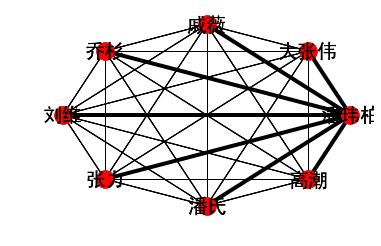

In [201]:
pos=nx.circular_layout(graph_with_weight_vis) 


for weight in all_weight:
    weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in graph_with_weight_vis.edges(data=True) if edge_attr['weight']==weight]
    width = weight
    nx.draw_networkx_edges(graph_with_weight_vis,pos,edgelist=weighted_edges,width=width)
    nx.draw(graph_with_weight_vis, pos=pos, with_labels=True, font_size=20)

In [202]:
sentences[1000]

'在上周五刚刚结束的挑战的法则中由潘玮柏大张伟戚薇乔杉刘维于小彤组成的首发嘉宾阵容在经过第一期户外挑战和比拼之后迎来了他们首次舞台表演潘玮柏首发登场霸气演绎分裂的时光超完美表演惊艳全场当晚6位嘉宾纷纷放大招拿出自己最擅长的绝技为观众呈现了一场最完美的演出潘玮柏首发登场经典歌曲被遗忘的时光24个比利的全新改编演绎分裂的时光在原曲嘻哈流行的基础上加入弦乐伴奏与合唱团搭配瞬间气势磅礴充满张力尤其独有的潘氏低音炮一开嗓就引发全场尖叫苏到极致让人见识到什么是开口跪系列舞台上的潘玮柏霸气侧漏气场十足特别是高潮处呈现出的那种撕心裂肺的感觉仿佛能把人带到歌的故事里去这个改编跟原曲比起来节奏放缓了却在这缓慢抒情的演绎中又不缺乏爆发力像在对人们诉说着他的音乐他的追求超震撼演绎瞬间引发网友热议这个版本的24个比利太震撼了现场还是那么稳从头赞到尾的表演低音好撩人实力没得说不愧为初代偶像超级帅的现场很有感觉男神魅力依旧不减啊现场是真的稳'

In [203]:
key_words = '奥巴马'

In [210]:
hit_ids = []

In [211]:
for i, sentence in enumerate(sentences[:5000]):
    if i % 500 == 0: print(i)
    if key_words in sentence:
        hit_ids.append(i)

0
500
1000
1500
2000
2500
3000
3500
4000
4500


In [231]:
total_dictionary = defaultdict(list)

for _id in hit_ids[:10]:
    for key, relation in get_name_correlate(sentences[_id]).items():
        total_dictionary[key] += [name for name in relation]

In [232]:
len(total_dictionary)

50

In [233]:
obama_graph = nx.Graph(total_dictionary)

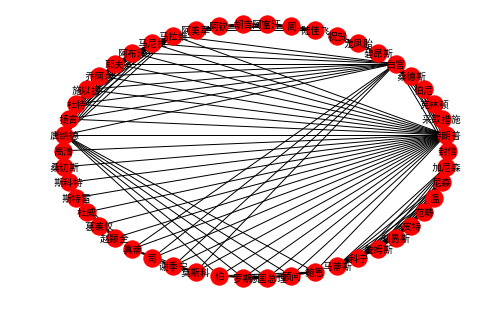

In [238]:
pos = nx.circular_layout(obama_graph)
nx.draw(obama_graph, pos=pos, with_labels=True, font_size=10)

In [216]:
sentences[633]

'这封信是由ScottSchoettes代笔他代表LucyBradleySpringerGinaBrownUlyssesBurleyIIIMichelleOgle和GrisselGranados等其他五名委员宣布了这一决定在信中他解释说特朗普政府没有采取措施来制定打击这种疾病的策略而且最令人担忧的是推出不利于艾滋病毒感染者的法案1995年时任总统克林顿宣布成立PACHA为艾滋病的迅速传播提供建议在前任美国总统奥巴马总统的指示下该委员会帮助政府制定了一项新的国家战略旨在减少艾滋病感染减少卫生方面的不平等现象等Schoettes指出虽然委员会在初选期间会见了希拉里克林顿和参议员伯尼桑德斯但没有机会与当时的候选人特朗普会面他还指出特朗普还没有为白宫国家艾滋病政策办公室任命一个负责人这封信特别指出用美国医疗法案AmericanHealthCareAct取代奥巴马的平价医疗法案AffordableCareAct的提案对于艾滋病毒感染者来说尤其是毁灭性的'

In [214]:
hit_ids

[367,
 633,
 828,
 1670,
 1691,
 1916,
 1935,
 2062,
 2076,
 2079,
 2336,
 2347,
 2354,
 2524,
 2771,
 2797,
 2818,
 2862,
 3044,
 3502,
 3520,
 3530,
 3578,
 3640,
 4188,
 4239,
 4244,
 4422,
 4556,
 4680,
 4814,
 4937]

## K-means文本聚类

![](imgs/k-means_result.gif)

![](imgs/k_means_2.png)

In [239]:
import random

In [367]:
points_num = 100

random_x = [random.randint(-100, 100) for _ in range(points_num)]
random_y = [random.randint(-100, 100) for _ in range(points_num)]

In [368]:
random_poinsts = [(x, y) for x, y in zip(random_x, random_y)]

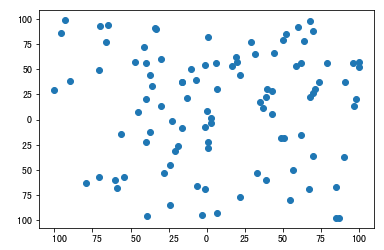

In [369]:
plt.scatter(random_x, random_y)

## ？想把上边的图，聚成3个cluster

## 给定N个数据，每个数据是d维的一个向量 我们想把它自动聚类聚成k的类别

## Step1: 随机初试K的点，点是随机的
## Step2: 对于我们N个数据点里边的每一个数据，我们把它归类，找到离每个数据，最近的K个点的之一



# Step1随机初始点

In [370]:
def generate_random_point(min_, max_):
    return random.randint(min_, max_), random.randint(min_, max_)

In [371]:
k1, k2, k3 = generate_random_point(-100, 100), generate_random_point(-100, 100), generate_random_point(-100, 100)

K = 5

pervious_kernels = [generate_random_point(-100, 100) for _ in range(K)]

In [372]:
k1

(65, -54)

In [373]:
k2

(74, 68)

In [374]:
k3

(33, -88)

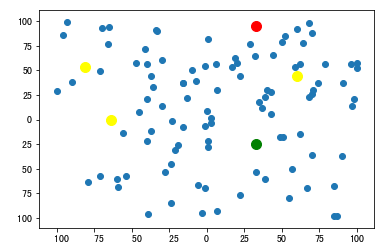

In [375]:
plt.scatter([pervious_kernels[0][0]], [pervious_kernels[0][1]], color='red', s=100)
plt.scatter([pervious_kernels[1][0]], [pervious_kernels[1][1]], color='green', s=100)
plt.scatter([pervious_kernels[2][0]], [pervious_kernels[2][1]], color='yellow', s=100)
plt.scatter([pervious_kernels[3][0]], [pervious_kernels[3][1]], color='yellow', s=100)
plt.scatter([pervious_kernels[4][0]], [pervious_kernels[4][1]], color='yellow', s=100)

plt.scatter(random_x, random_y)

In [376]:
def dis(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

In [360]:
import numpy as np

In [361]:
np.argmin([10, 9, 8, 9, 10])

2

In [320]:
len(groups)

5

In [377]:
previous_kernels = [generate_random_point(-100, 100) for _ in range(K)]

red
根据新的Group获得的kernal和之前的kernel的距离是: 0.0
green
根据新的Group获得的kernal和之前的kernel的距离是: 0.0
yellow
根据新的Group获得的kernal和之前的kernel的距离是: 0.0
blue
根据新的Group获得的kernal和之前的kernel的距离是: 0.0
purple
根据新的Group获得的kernal和之前的kernel的距离是: 0.0


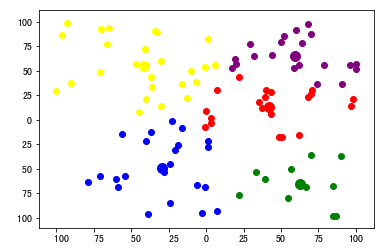

In [387]:
kernel_colors = ['red', 'green', 'yellow', 'blue', 'purple']

new_kernels = []

groups = [[] for _ in range(K)] 


for p in random_poinsts:
    distances = [dis(p, k) for k in previous_kernels]
    
    min_index = np.argmin(distances)
    
    groups[min_index].append(p)
    
for i, p in enumerate(previous_kernels):
    plt.scatter([p[0]], [p[1]], color=kernel_colors[i], s=100)
#plt.scatter([previous_kernels[1][0]], [previous_kernels[1][1]], color=kernel_colors[1], s=100)
#plt.scatter([previous_kernels[2][0]], [previous_kernels[2][1]], color=kernel_colors[2], s=100)


for i, g in enumerate(groups):
    g_x = [_x for _x, _y in g]
    g_y = [_y for _x, _y in g]
    
    n_k_x, n_k_y = np.mean(g_x), np.mean(g_y)
    new_kernels.append((n_k_x, n_k_y))
    
    print(kernel_colors[i])
    plt.scatter(g_x, g_y, color=kernel_colors[i])
   # plt.scatter([n_k_x], [n_k_y], color=kernel_colors[i], alpha=0.5, s=200)
    
    print('根据新的Group获得的kernal和之前的kernel的距离是: {}'.format(dis((n_k_x, n_k_y), 
                                                            previous_kernels[i])))

#plt.scatter(random_x, random_y, s=10)

previous_kernels = new_kernels

根据新的Group获得的kernal和之前的kernel的距离是: 0.0
根据新的Group获得的kernal和之前的kernel的距离是: 0.0
根据新的Group获得的kernal和之前的kernel的距离是: 0.0
根据新的Group获得的kernal和之前的kernel的距离是: 0.0
根据新的Group获得的kernal和之前的kernel的距离是: 0.0


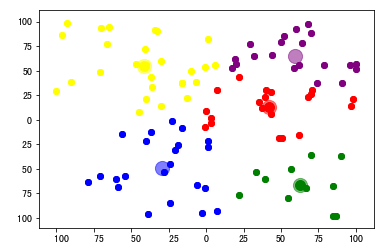

In [388]:

for p in random_poinsts:
    distances = [dis(p, k) for k in previous_kernels]
    
    min_index = np.argmin(distances)
    
    groups[min_index].append(p)

plt.scatter([previous_kernels[0][0]], [previous_kernels[0][1]], color=kernel_colors[0], s=100)
plt.scatter([previous_kernels[1][0]], [previous_kernels[1][1]], color=kernel_colors[1], s=100)
plt.scatter([previous_kernels[2][0]], [previous_kernels[2][1]], color=kernel_colors[2], s=100)

new_kernels = []

for i, g in enumerate(groups):
    g_x = [_x for _x, _y in g]
    g_y = [_y for _x, _y in g]
    
    n_k_x, n_k_y = np.mean(g_x), np.mean(g_y)
    new_kernels.append((n_k_x, n_k_y))
    
    plt.scatter(g_x, g_y, color=kernel_colors[i])
    plt.scatter([n_k_x], [n_k_y], color=kernel_colors[i], alpha=0.5, s=200)
    
    print('根据新的Group获得的kernal和之前的kernel的距离是: {}'.format(dis((n_k_x, n_k_y), 
                                                            previous_kernels[i])))
#    plt.scatter()

#plt.scatter(random_x, random_y, s=10)

In [290]:
previous_kernels = new_kernels

根据新的Group获得的kernal和之前的kernel的距离是: 0.0
根据新的Group获得的kernal和之前的kernel的距离是: 0.0
根据新的Group获得的kernal和之前的kernel的距离是: 0.0


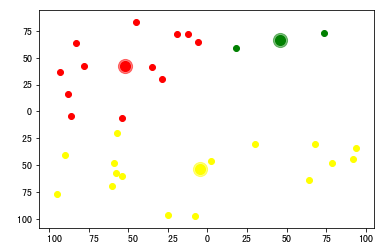

In [291]:
groups = [[], [], []]

for p in random_poinsts:
    distances = [dis(p, k) for k in previous_kernels]
    
    min_index = np.argmin(distances)
    
    groups[min_index].append(p)

plt.scatter([previous_kernels[0][0]], [previous_kernels[0][1]], color=kernel_colors[0], s=100)
plt.scatter([previous_kernels[1][0]], [previous_kernels[1][1]], color=kernel_colors[1], s=100)
plt.scatter([previous_kernels[2][0]], [previous_kernels[2][1]], color=kernel_colors[2], s=100)

new_kernels = []

for i, g in enumerate(groups):
    g_x = [_x for _x, _y in g]
    g_y = [_y for _x, _y in g]
    
    n_k_x, n_k_y = np.mean(g_x), np.mean(g_y)
    new_kernels.append((n_k_x, n_k_y))
    
    plt.scatter(g_x, g_y, color=kernel_colors[i])
    plt.scatter([n_k_x], [n_k_y], color=kernel_colors[i], alpha=0.5, s=200)
    
    print('根据新的Group获得的kernal和之前的kernel的距离是: {}'.format(dis((n_k_x, n_k_y), 
                                                            previous_kernels[i])))
#    plt.scatter()

#plt.scatter(random_x, random_y, s=10)

In [292]:
previous_kernels = new_kernels

根据新的Group获得的kernal和之前的kernel的距离是: 0.0
根据新的Group获得的kernal和之前的kernel的距离是: 0.0
根据新的Group获得的kernal和之前的kernel的距离是: 0.0


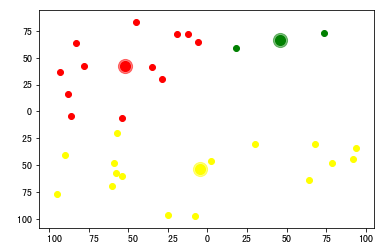

In [293]:
groups = [[], [], []]

for p in random_poinsts:
    distances = [dis(p, k) for k in previous_kernels]
    
    min_index = np.argmin(distances)
    
    groups[min_index].append(p)

plt.scatter([previous_kernels[0][0]], [previous_kernels[0][1]], color=kernel_colors[0], s=100)
plt.scatter([previous_kernels[1][0]], [previous_kernels[1][1]], color=kernel_colors[1], s=100)
plt.scatter([previous_kernels[2][0]], [previous_kernels[2][1]], color=kernel_colors[2], s=100)

new_kernels = []

for i, g in enumerate(groups):
    g_x = [_x for _x, _y in g]
    g_y = [_y for _x, _y in g]
    
    n_k_x, n_k_y = np.mean(g_x), np.mean(g_y)
    new_kernels.append((n_k_x, n_k_y))
    
    plt.scatter(g_x, g_y, color=kernel_colors[i])
    plt.scatter([n_k_x], [n_k_y], color=kernel_colors[i], alpha=0.5, s=200)
    
    print('根据新的Group获得的kernal和之前的kernel的距离是: {}'.format(dis((n_k_x, n_k_y), 
                                                            previous_kernels[i])))
#    plt.scatter()

#plt.scatter(random_x, random_y, s=10)

In [294]:
new_kernels

[(-52.333333333333336, 42.666666666666664), (46.0, 66.0), (-4.8125, -53.8125)]

In [280]:
plt.scatter?

In [ ]:
k1, k2, k3 = 